# <center> Topic 1. Exploratory data analysis with Pandas
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here").**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

**Read data into a Pandas DataFrame**

In [157]:
data = pd.read_csv("titanic_train.csv", index_col="PassengerId")

**First 5 rows**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [109]:
data.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Let's select those passengers who embarked in Cherbourg (Embarked=C) and paid > 200 pounds for their ticker (fare > 200).**

Make sure you understand how actually this construction works.

In [5]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


**We can sort these people by Fare in descending order.**

In [8]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Let's create a new feature.**

In [10]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [11]:
age_categories = [age_category(age) for age in data.Age]
data["Age_category"] = age_categories

**Another way is to do it with `apply`.**

In [14]:
data["Age_category"] = data["Age"].apply(age_category)

**1. How many men/women were there onboard?**
- 412 men and 479 women
- 314 men and 577 women
- 479 men and 412 women
- 577 men and 314 women

In [30]:
male_count, female_count = len(data[data["Sex"] == "male"]), len(data[data["Sex"] == "female"])

print(f"{male_count} men, {female_count} women")  # last answer is correct

577 men, 314 women


**2. Print the distribution of the `Pclass` feature. Then the same, but for men and women separately. How many men from second class were there onboard?**
- 104
- 108
- 112
- 125

In [43]:
pd.crosstab(data["Sex"], data["Pclass"], margins=True)  # second answer is correct

# data.groupby(["Sex", "Pclass"]).agg(
#     {'Pclass':'count'}
# )

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


#### Visualization

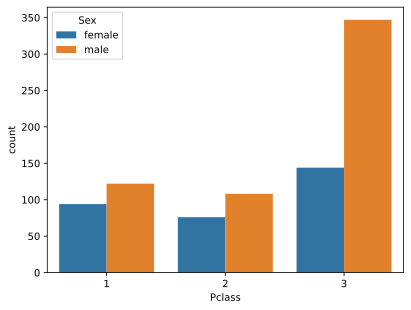

In [42]:
import seaborn as sns
sns.countplot(x="Pclass", hue="Sex", data=data)
plt.show()

**3. What are median and standard deviation of `Fare`?. Round to two decimals.**
- median is  14.45, standard deviation is 49.69
- median is 15.1, standard deviation is 12.15
- median is 13.15, standard deviation is 35.3
- median is  17.43, standard deviation is 39.1

In [46]:
median = data["Fare"].median()
standard_deviation = data["Fare"].std()

print(f"median: {round(median, 2)}, standard_deviation: {round(standard_deviation, 2)}")  # first answer is correct

median: 14.45, standard_deviation: 49.69


**4. Is that true that the mean age of survived people is higher than that of passengers who eventually died?**
- Yes
- No


In [162]:
# answer is no
survived_people_mean = data[data["Survived"] == 1]["Age"].mean()
died_people_mean = data[data["Survived"] == 0]["Age"].mean()
print(f"answer: {survived_people_mean > died_people_mean}")

data.groupby(["Survived"]).agg(
    {'Age':'mean'}, 
)

answer: False


,Age
Survived,
0,30.63
1,28.34


**5. Is that true that passengers younger than 30 y.o. survived more frequently than those older than 60 y.o.? What are shares of survived people among young and old people?**
- 22.7% among young and 40.6% among old
- 40.6% among young and 22.7% among old
- 35.3% among young and 27.4% among old
- 27.4% among young and  35.3% among old

In [172]:
young_freq = len(data[(data["Age"] < 30) & (data["Survived"] == 1)])/len(data[(data["Age"] < 30)])
old_freq = len(data[(data["Age"] > 60) & (data["Survived"] == 1)])/len(data[(data["Age"] > 60)])

print(young_freq, old_freq)  # second answer is correct (YES)

0.40625 0.22727272727272727


**6. Is that true that women survived more frequently than men? What are shares of survived people among men and women?**
- 30.2% among men and 46.2% among women
- 35.7% among men and 74.2% among women
- 21.1% among men and 46.2% among women
- 18.9% among men and 74.2% among women

In [175]:
male_freq = len(data[(data["Sex"] == "male") & (data["Survived"] == 1)])/len(data[(data["Sex"] == "male")])
female_freq = len(data[(data["Sex"] == "female") & (data["Survived"] == 1)])/len(data[(data["Sex"] == "female")])

print(male_freq, female_freq)  # last answer is correct (YES)

0.18890814558058924 0.7420382165605095


**7. What's the most popular first name among male passengers?**
- Charles
- Thomas
- William
- John

In [248]:
get_first_name = lambda name: name.split(",")[1].split()[1]

data["first_name"] = [get_first_name(name) for name in data.Name]


data[data["Sex"] == "male"].groupby(["first_name"]).agg(
    count=("first_name", "count")
).sort_values(by="count", ascending=False)
# answer is William
# via iloc[0] we can get first line; answer = (...).iloc[0].name

,count
first_name,
William,35
John,25
George,14
Thomas,13
Charles,13
...,...
Jan,1
Jacques,1
Kurt,1


**8. How is average age for men/women dependent on `Pclass`? Choose all correct statements:**
- On average, men of 1 class are older than 40
- On average, women of 1 class are older than 40
- Men of all classes are on average older than women of the same class
- On average, passengers of the first class are older than those of the 2nd class who are older than passengers of the 3rd class

In [262]:
data.groupby(["Pclass", "Sex"]).agg(
    {"Age": "mean"}
)

# answers: [1, 3, 4]

Age
Pclass Sex          
1      female  34.61
       male    41.28
2      female  28.72
       male    30.74
3      female  21.75
       male    26.51

In [293]:
# checking
qwe = data.groupby(["Pclass", "Sex"]).agg({"Age": "mean"})

print(f"answer_1: {qwe.loc[(1, "male"), "Age"] > 40}")
print(f"answer_2: {qwe.loc[(1, "female"), "Age"] > 40}")
print(f"answer_3: {all(qwe.loc[(class_id+1, "male"), "Age"] > qwe.loc[(class_id+1, "female"), "Age"]
                    for class_id in range(3))}")
print(f"answer_4: {all(qwe.loc[(i+1, gender), "Age"] > qwe.loc[(i+2, gender), "Age"] for gender in ["male", "female"] 
                    for i in range(2))}")

answer_1: True
answer_2: False
answer_3: True
answer_4: True
